# **Image Segmentation usng pretrained DeepLabV3 with backbone resnet**

## **Load the pretrained DeepLabV3 model from PyTorch Hub**

In [2]:
import torch
model = torch.hub.load("pytorch/vision:v0.10.0", "deeplabv3_resnet101", pretrained = True)
model.eval()    # Set the model into evaluation mode

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 244MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

## **Preprocessing function for input image**

In [3]:
from PIL import Image
from torchvision import transforms

def preprocess_image(image_path):
    """
    Preprocess the input image to match models' requirements.
    """
    input_image = Image.open(image_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.ToTensor(),  # Convert PIL image to tensor
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]) # Normalize
    ])
    input_tensor = preprocess(input_image).unsqueeze(0) # Add batch dimention
    return input_tensor, input_image

## **Postprocessing function for segmentation output**

In [4]:
def postprocess_output(output, image_size):
    """
    Postprocess the model output to generate a segmantation map.
    """
    output_predictions = output["out"].argmax(1)[0].byte().cpu().numpy()    # get the most probable class per pixel
    segmentation_map = Image.fromarray(output_predictions).resize(image_size, Image.NEAREST)    # resize to original size
    return segmentation_map

## **Tests**

### **street03.jpg**

In [5]:
# Path to your custom image
image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Semantic Segmentation/images/street03.jpg"

In [6]:
# Preprocess the image
input_tensor, input_image = preprocess_image(image_path)

In [7]:
# Perform interface
with torch.no_grad():   # Disable gradient computationfor interface
    output = model(input_tensor)

In [8]:
# Postprocess the output
segmentation_map = postprocess_output(output, input_image.size)

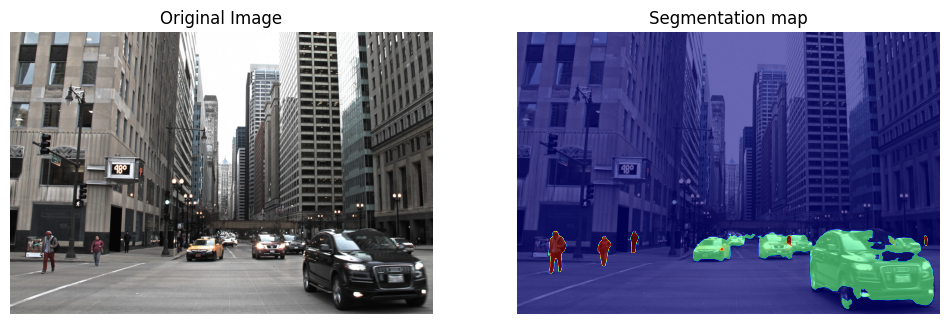

In [9]:
# Visualize the original image and segmentation result

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(segmentation_map, cmap = "jet", alpha = 0.6)
plt.title("Segmentation map")
plt.axis("off")
plt.show()

### **Loop test**

In [29]:
import os
import matplotlib.pyplot as plt

In [30]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Semantic Segmentation/images"
images_list = os.listdir(folder_path)

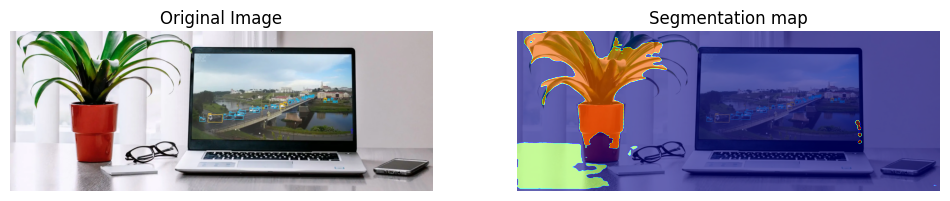

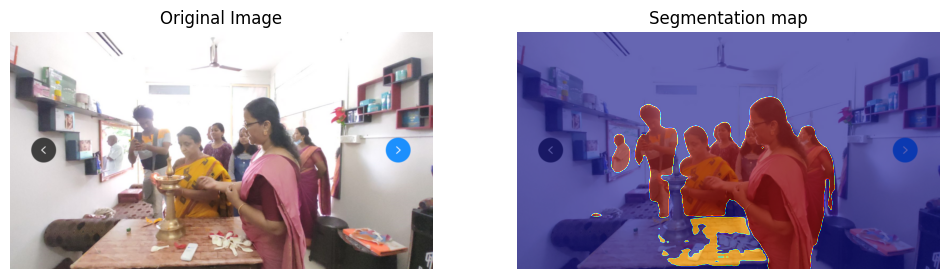

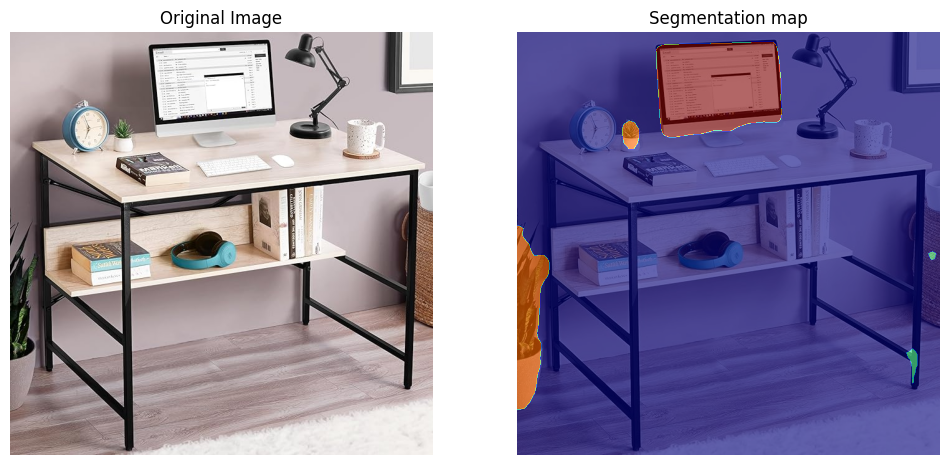

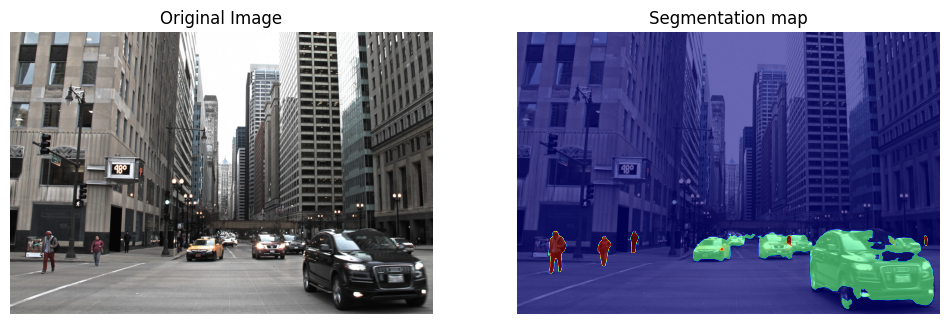

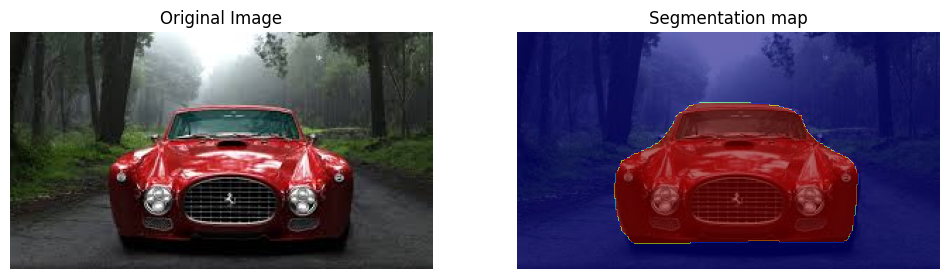

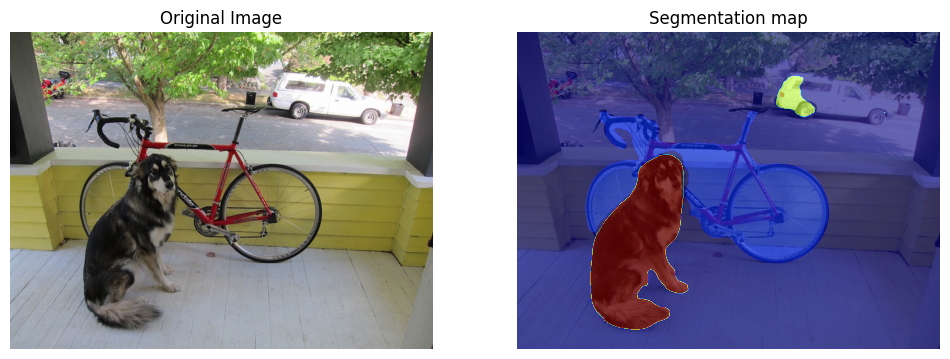

In [32]:
for i in images_list:
    image_path = os.path.join(folder_path, i)

    # Preprocess the image
    input_tensor, input_image = preprocess_image(image_path)

    # Perform interface
    with torch.no_grad():   # Disable gradient computationfor interface
        output = model(input_tensor)

    # Postprocess the output
    segmentation_map = postprocess_output(output, input_image.size)

    # Visualize the original image and segmentation result
    plt.figure(figsize = (12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(input_image)
    plt.imshow(segmentation_map, cmap = "jet", alpha = 0.6)
    plt.title("Segmentation map")
    plt.axis("off")
    plt.show()